In [310]:
#DATA PREPROCESSING(Data cleaning)
# Is the most critical task.95% of the time is spent on cleaning
#MULTIVARIATE DATA
#Both numeric and non-numeric data

#Steps
#1) check for null columns or variables by doing info()-delete those variables

#2) check for single value columns-whole colunm has only one value like 0's or 1's.Delete those variables

#3) Missing values- occur due to errors in data collection or due to misrepresentation of data.
#They must be imputed or treated before running the algorithm.
#a) if the column is having more tha 70% of the missing values and if its not significant varible delete the variable
#b)if the column is having more tha 70% of the missing values and if its significant 
# Numeric variable- impute with numeric code like 999,1111
#Non-numeric- impute word missing or not available
#c) if column has less than 70% missing values imputation can be done either manually or using algorithm

#MANUAL IMPUTATION-Mean,median,or mode of the column
#Numeric-impute with mean and if mean is distorted use median
#Categoric-use mode_or more frequent data


#ALGORTHIM BASED IMPUTATION
#Variables on the missing value and impute accordingly.


# Multivariate imputation based on chained Equations(MICE) 
# Impute both numerical and categorical data simultaneously-Python skilearn iterative imputer

#KNN Imputer- Uses K nearest algorithm  using Euclidean distance. Imputation is based on closest neighbours.
# KNN Imputer works only on numeric data.

# PCA-probablistic principal component analysis Algorithm.

#deletion of missing values can be done only is there is large data and missing values is less then 5% of the data.


# 4) DATA TRANSFORMATION
# Its where we resize or reshape the range to specific range of values.
# Dependent variables (y)- is the variable which is asked to predict- Regression problem- Skewness and outliners are the biggest issues
# Y is numerical , continuous,closer to normal distribution with minimum outliners and no missing values-Regression Models.
# Positive skewness - Lograthmic Transformation or square root transformation
# Negative skewness - Exponentinal transorfation or power transformation

# Dependent variables (y)- is non numeric or either Binary (Yes/No) OR Multinomial(more than 2 levels)- Classification models must be used
# Ex- Multinomial- Emotional variable- Happy,sad,very sad, neutral.
# Imbalance data is biggest problem. Ex- Credit card default(y) -Yes(1000),No(9000). Minority class (yes) prediction will be worst.
# Sampling like under sampling and oversampling must be impleted.


# Independent variables(X)- Numeric variables- When variables are in different mathematical units
# Ex- X1-Lakhs,X2-Thousands,X3-Hundreds, X4-Tens,X5-Discrete values.-Scaling of the data must be done.
# 1) Srandard scaler or standardization- Calculate Z Score= (X-Mean)/ SD
# Scaling will give both +ve and -Ve values
# 2) Min Max scaler Or Normalisation- (X-Min)/(Xmax-XMin) will scale all values in the range of 0 to 1 without negative values.
# 3) Robust values based on Quartiles - (X-Q2)/(Q3-Q1) is used when data has many outliners.


#5) Dummy Variables encoding- assigning numerical identifiers to groups,levels in categorical variables.
#Independent variables(X)- Non Numeric or Categorical.- X should be always numeric SO,
# Assign numerical identifiers to text categories called dummy variables Encoding.
# A) Label encoder- encodes the object or categorical data by assigning numeric identifiers from 0 to n levels/classes in alphabetic order
# EX- Gender-F,M,M,M,F,F,F,M
#     Gender-1,0,0,0,1,1,1,0

# B) pd.get_dummies()-encodes the object or categorical data using binary encoding(Yes-1,No-0) and also adds additional columns/variables based on levels in categorical data
# EX- Gender-F,M,M,M,F,F,F,M
#  Gender_F-1,0,0,0,1,1,1,0
#   Gender_M-0,1,1,1,0,0,0,1
#dummy variable encoding must be done on object/text data,numeric
#categorical variables like ratings, quartar,monthetc

#6)working with dates- dates must be converted into date format using pd.to_datetime()function
#extract variables from date like weekday,month,season,quarter,year etc.
#timedelta which is different in time

# Dealing with DUPLICATE LEVELS OR CLASSESIN CATEGORICAL VARIABLES
#Ex- Male,M,m,F,Female
 
#7) Dealing with characters like coma, space,currency in numeric data. String or regular expression functions must be used.

#8) Extracting information like codes from Alpha numeric Identifiers Or ID

#9) Formatting dates into default YYYY-MM-DD HH:MM:SS. pd.to_datetime()

#10) Create new variables from existing variables. Combination of multiple variable

#11) Converting variables from categorical to numeric or vice-versa.

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
import io 
%cd "C:\Users\chkee\Downloads\Imarticus Learning\Python\Bigmart"

C:\Users\chkee\Downloads\Imarticus Learning\Python\Bigmart


In [313]:
bigmarttrain=pd.read_csv("train.csv")

In [314]:
bigmarttest=pd.read_csv("test.csv")

In [315]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [316]:
bigmarttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [317]:
bigmarttrain[['Outlet_Establishment_Year','Item_Outlet_Sales','Item_MRP','Item_Visibility','Item_Weight']].describe()


,Outlet_Establishment_Year,Item_Outlet_Sales,Item_MRP,Item_Visibility,Item_Weight
count,8523.000000,8523.000000,8523.000000,8523.000000,7060.000000
mean,1997.831867,2181.288914,140.992782,0.066132,12.857645
std,8.371760,1706.499616,62.275067,0.051598,4.643456
min,1985.000000,33.290000,31.290000,0.000000,4.555000
25%,1987.000000,834.247400,93.826500,0.026989,8.773750
50%,1999.000000,1794.331000,143.012800,0.053931,12.600000
75%,2004.000000,3101.296400,185.643700,0.094585,16.850000
max,2009.000000,13086.964800,266.888400,0.328391,21.350000


<Axes: ylabel='Outlet_Type'>

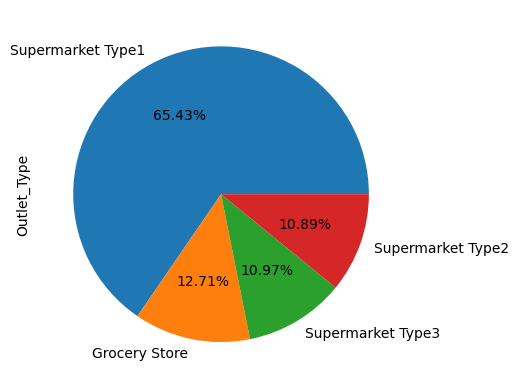

In [318]:
bigmarttrain.Outlet_Type.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Outlet_Location_Type'>

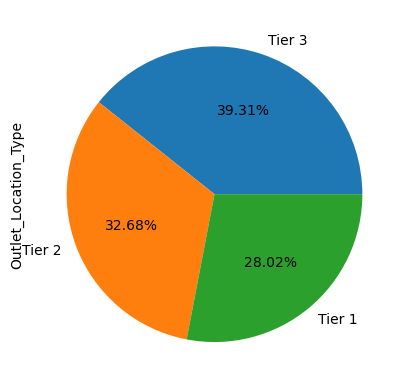

In [319]:
bigmarttrain.Outlet_Location_Type.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: >

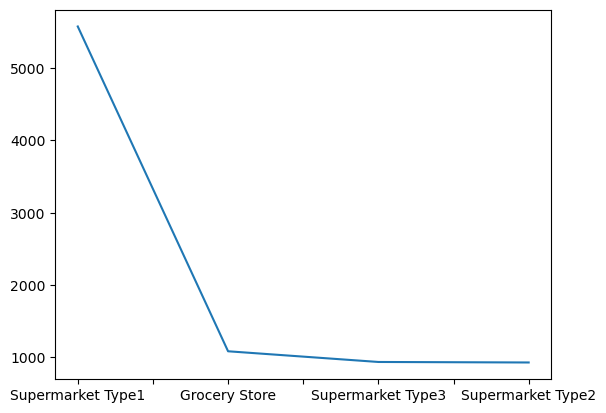

In [320]:
bigmarttrain.Outlet_Type.value_counts().plot(kind='line')

<Axes: ylabel='Outlet_Size'>

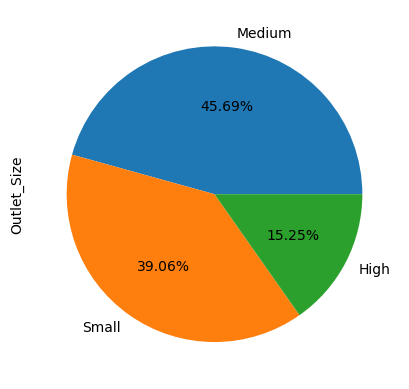

In [321]:
bigmarttrain.Outlet_Size.value_counts().plot(kind='pie',autopct='%.2f%%')

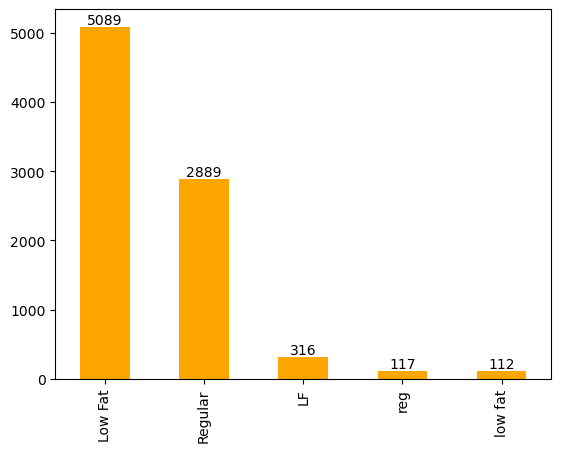

In [322]:
ax=bigmarttrain.Item_Fat_Content.value_counts().plot(kind='bar',color='Orange')
for i in ax.containers:
    ax.bar_label(i)

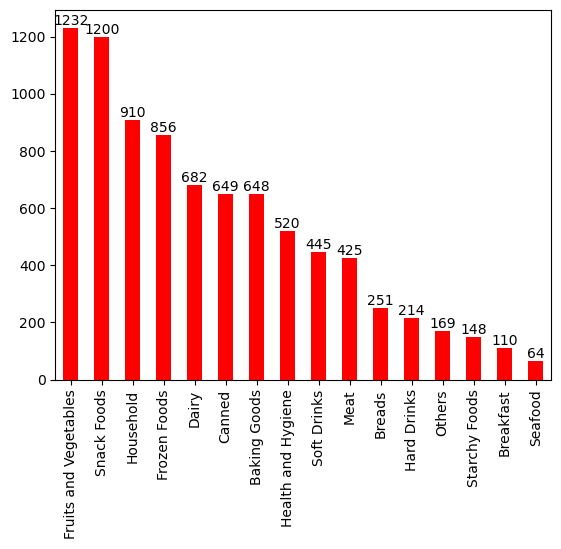

In [323]:
ax=bigmarttrain.Item_Type.value_counts().plot(kind='bar',color='Red')
for i in ax.containers:
    ax.bar_label(i)

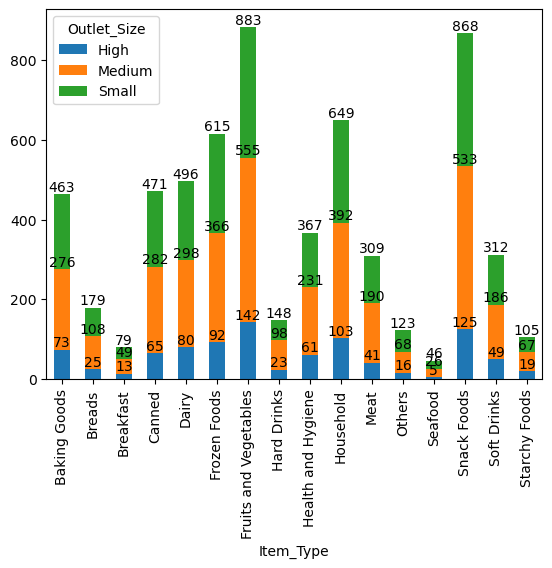

In [324]:
ax=pd.crosstab(bigmarttrain.Item_Type,bigmarttrain.Outlet_Size).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [325]:
#Histogram, Boxplot and Density Curve on balance and duration
import seaborn as sns

In [326]:
bigmarttrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [327]:
print(bigmarttrain.Item_Outlet_Sales.skew())
# positive skewness indicates the graph is slightly towards left
print(bigmarttrain.Item_Outlet_Sales.kurt())
# <3 kurtosis is so curve is broad

1.1775306028542796
1.6158766814287264


<Axes: ylabel='Frequency'>

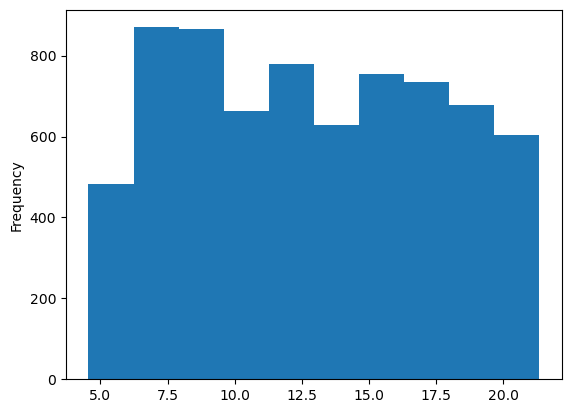

In [328]:
bigmarttrain['Item_Weight'].plot(kind='hist')

<Axes: >

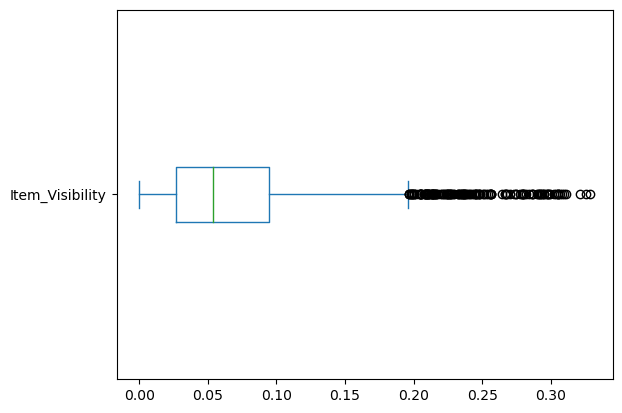

In [329]:
bigmarttrain['Item_Visibility'].plot(kind='box',vert=False)
#many outliers and the median is towards left

<Axes: ylabel='Density'>

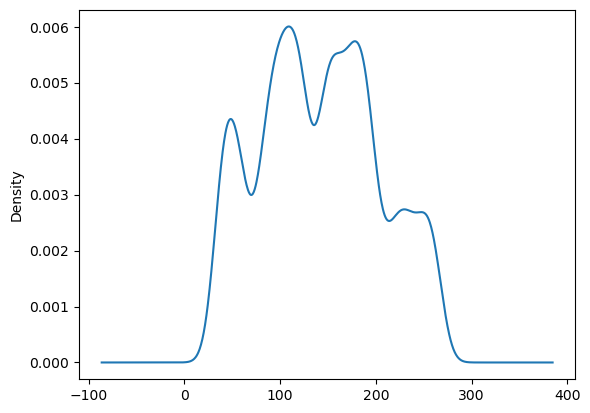

In [330]:
bigmarttrain['Item_MRP'].plot(kind='density')
#uneven distribution of the prices

In [331]:
# Relationship between MRP and sales
bigmarttrain[['Item_MRP','Item_Outlet_Sales','Item_Weight','Item_Visibility']].corr()

,Item_MRP,Item_Outlet_Sales,Item_Weight,Item_Visibility
Item_MRP,1.000000,0.567574,0.027141,-0.001315
Item_Outlet_Sales,0.567574,1.000000,0.014123,-0.128625
Item_Weight,0.027141,0.014123,1.000000,-0.014048
Item_Visibility,-0.001315,-0.128625,-0.014048,1.000000


In [332]:
bigmarttrain[['Item_MRP','Item_Outlet_Sales','Item_Weight','Item_Visibility']].cov()

,Item_MRP,Item_Outlet_Sales,Item_Weight,Item_Visibility
Item_MRP,3878.183909,6.031749e+04,7.865693,-0.004225
Item_Outlet_Sales,60317.485612,2.912141e+06,100.560811,-11.325611
Item_Weight,7.865693,1.005608e+02,21.561688,-0.003172
Item_Visibility,-0.004225,-1.132561e+01,-0.003172,0.002662


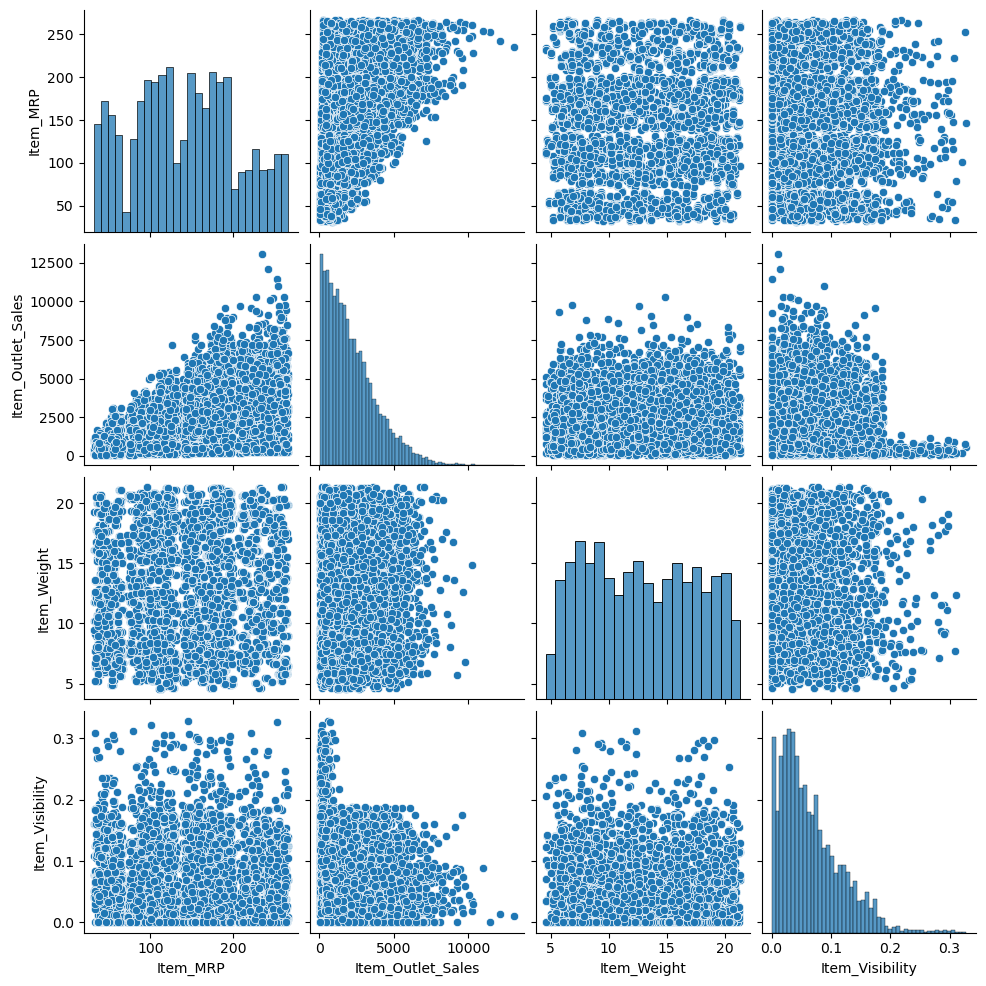

In [333]:
sns.pairplot(bigmarttrain[['Item_MRP','Item_Outlet_Sales','Item_Weight','Item_Visibility']])

<Axes: >

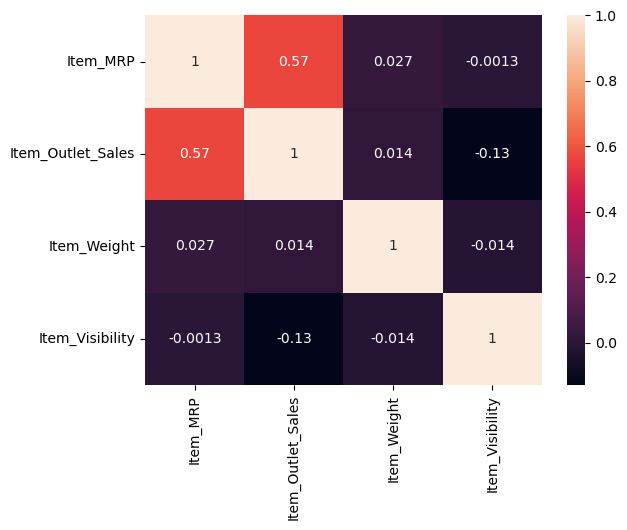

In [334]:
sns.heatmap(bigmarttrain[['Item_MRP','Item_Outlet_Sales','Item_Weight','Item_Visibility']].corr(),annot=True)

In [335]:
# HYPOTHESIS TESTING
# Test null avg Item outlet sales and outlet type

In [336]:

bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).mean()
# means are different

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [337]:
#check variance-variance should not be same to the individual group
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).var()

Outlet_Type
Grocery Store        6.804355e+04
Supermarket Type1    2.298152e+06
Supermarket Type2    1.893191e+06
Supermarket Type3    4.527363e+06
Name: Item_Outlet_Sales, dtype: float64

In [338]:
# as there are more than 2 group we do ANNOVA testing
from scipy.stats import f_oneway

In [339]:
#Split the data
t1=bigmarttrain[bigmarttrain.Outlet_Type=='Supermarket Type1']
t2=bigmarttrain[bigmarttrain.Outlet_Type=='Supermarket Type2']
t3=bigmarttrain[bigmarttrain.Outlet_Type=='Supermarket Type3']

In [340]:
f_oneway(t1.Item_Outlet_Sales,t2.Item_Outlet_Sales,t3.Item_Outlet_Sales)
# pvalue is less than 0.05 reject null There is significant association between outlet type and sales

F_onewayResult(statistic=343.9181990337556, pvalue=1.402711127727785e-143)

In [341]:
# HYPOTHESIS TESTING
# Test null avg Item outlet sales and outlet Location type

In [342]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [343]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).var()

Outlet_Location_Type
Tier 1    2.438749e+06
Tier 2    2.312053e+06
Tier 3    3.657470e+06
Name: Item_Outlet_Sales, dtype: float64

In [344]:
#split the groups
T1=bigmarttrain[bigmarttrain.Outlet_Location_Type=='Tier 1']
T2=bigmarttrain[bigmarttrain.Outlet_Location_Type=='Tier 2']
T3=bigmarttrain[bigmarttrain.Outlet_Location_Type=='Tier 3']

In [345]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)
# pvalue is less than 0.05 reject null There is significant association between outlet location and sales

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [346]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Size).mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [347]:
#CONCATINATION OF BOTH FILES -for preprocessing
#For concatination the columns must be same.
#For concatination temporarily add dependent variable to test data and fill column with 'test'


In [348]:
#as both dataframe must have same columns
bigmarttest['Item_Outlet_Sales']='test'#adding the column to test file and columns filled with test

In [349]:
#concatination of dataframes fpr preprocessing
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

#axis=0 is row wise concat
#axis=1 is col concat

In [350]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [351]:
#separate num and non num cols in preprocessing

numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

#np.number selects both int64 and float64

In [352]:
numcols.describe()

#count value is not matching to total rows so imputation need to be done
#check mean and med 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [353]:
#impute item weight
numcols.Item_Weight=numcols.Item_Weight.fillna(numcols.Item_Weight.mean())

In [354]:
#impute outletsize
objcols.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [355]:
#impute word "missing
objcols.Outlet_Size=objcols.Outlet_Size.fillna("Missing")

In [356]:
objcols.Item_Identifier.head()


0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [357]:
#create new variable called item_code based on identifier
objcols['itemcode']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [358]:
objcols.itemcode.value_counts()

FD    10201
NC     2686
DR     1317
Name: itemcode, dtype: int64

In [359]:
objcols.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [360]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [361]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace('reg','Regular')

In [362]:
for col in objcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
Hig

In [363]:
#Create a new variable 'Outlet_age' as of 2022 using outlet establishment year.
numcols['outlet_age']=2022-numcols.Outlet_Establishment_Year

In [364]:
numcols.outlet_age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: outlet_age, dtype: float64

In [365]:
#Data transformation for numeric variables-independent variable
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [366]:
numcols_df=numcols.drop('Outlet_Establishment_Year',axis=1)

In [367]:
stdscaler=StandardScaler() #renaming Standard Scaler as stdscaler

In [368]:
numcols_df_scaled=stdscaler.fit_transform(numcols_df)  # all the numeric data is converted to similar datatype

In [369]:
numcols_df_scaled=pd.DataFrame(numcols_df_scaled,columns=numcols_df.columns) 
#array are converted to dataframe with column names

In [370]:
numcols_df_scaled.head(10)
#has both negative and positive values in standardisation or standard scaler

,Item_Weight,Item_Visibility,Item_MRP,outlet_age
0,-8.249387e-01,-0.969852,1.752511,-0.139681
1,-1.623224e+00,-0.907063,-1.493696,-1.334228
2,1.111729e+00,-0.956000,0.009874,-0.139681
3,1.513233e+00,-1.281712,0.661838,-0.020226
4,-9.123249e-01,-1.281712,-1.403623,1.293777
5,-5.663227e-01,-1.281712,-1.443256,-1.334228
6,2.024398e-01,-1.034104,-1.342458,1.293777
7,-4.195381e-16,1.195510,-0.535442,1.532686
8,8.046962e-01,-0.957418,-0.709230,-0.498045
9,1.513233e+00,0.553801,0.754073,-1.095319


In [371]:
#Normalisation or MINMAXscaler
minmax=MinMaxScaler()

In [372]:
numcols_df_minmax=minmax.fit_transform(numcols_df)

In [373]:
numcols_df_minmax=pd.DataFrame(numcols_df_minmax,columns=numcols_df.columns)

In [374]:
numcols_df_minmax.head()
#there are no negative values and rnge is only 0-1 in normalisation


,Item_Weight,Item_Visibility,Item_MRP,outlet_age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [375]:
#ROBUST SCALER-Uses quartiles used in case of outliers
robust=RobustScaler()

In [376]:
numcols_df_robust=robust.fit_transform(numcols_df)

In [377]:
numcols_df_robust=pd.DataFrame(numcols_df_robust,columns=numcols_df.columns)

In [378]:
numcols_df_robust.head()   # if we dont want outliers we use robustscaler

,Item_Weight,Item_Visibility,Item_MRP,outlet_age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

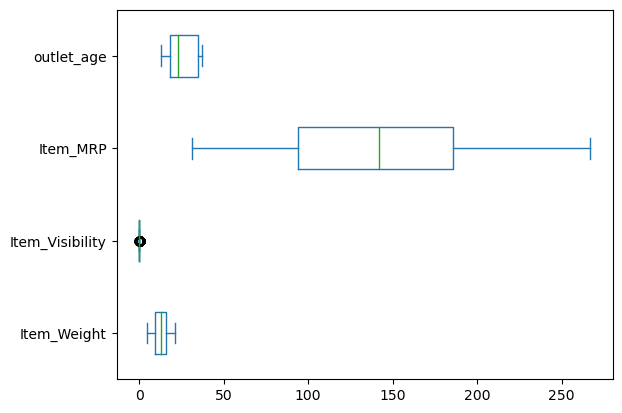

In [379]:
numcols_df.plot(kind='box',vert=False)

<Axes: >

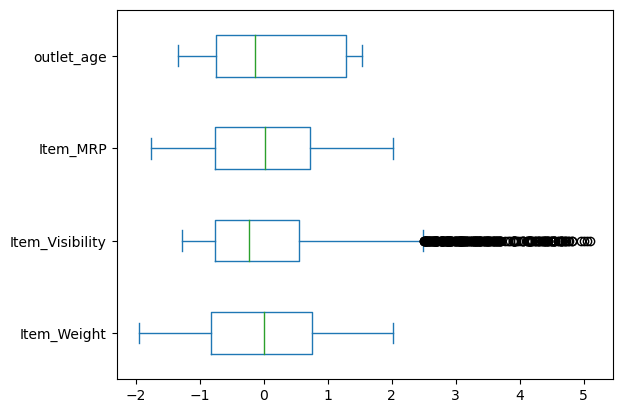

In [380]:
numcols_df_scaled.plot(kind='box',vert=False)

<Axes: >

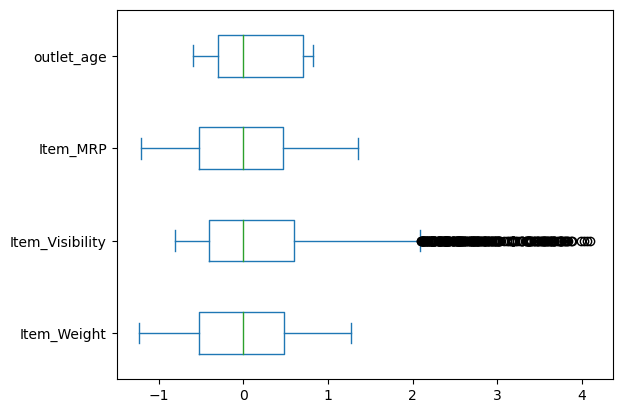

In [381]:
numcols_df_robust.plot(kind='box',vert=False)

<Axes: >

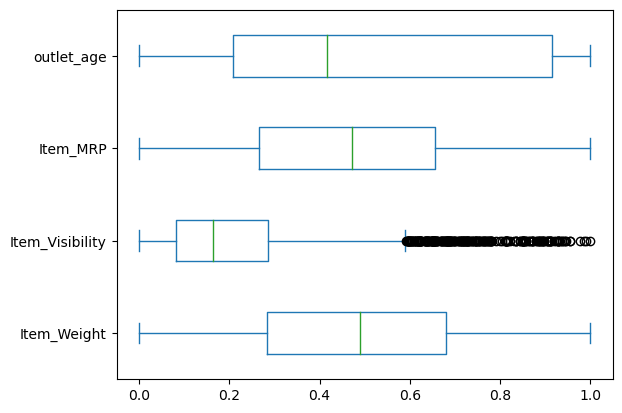

In [382]:
numcols_df_minmax.plot(kind='box',vert=False) # for visuallisation use minmax scaler as the pixels are in 0-225

In [383]:
#DUMMY VARIABLE ENCODING- encoding object or string data
numcols_df['Item_Outlet_Sales']=objcols.Item_Outlet_Sales   #moving from obj to number-dependent col

In [384]:
#deleting from bojcolumn
objcols=objcols.drop('Item_Outlet_Sales',axis=1)

In [385]:
from sklearn.preprocessing import LabelEncoder

In [386]:
le=LabelEncoder()

In [387]:
objcols_encode=objcols.apply(le.fit_transform)

In [388]:
objcols_encode.head(10)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,itemcode
0,156,0,4,9,1,0,1,1
1,8,1,14,3,1,2,2,0
2,662,0,10,9,1,0,1,1
3,1121,1,6,0,2,2,0,1
4,1297,0,9,1,0,2,1,2
5,758,1,0,3,1,2,2,1
6,696,1,13,1,0,2,1,1
7,738,0,13,5,1,2,3,1
8,440,1,5,7,2,1,1,1
9,990,1,5,2,2,1,1,1


In [389]:
objcols.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,itemcode
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [390]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'itemcode'],
      dtype='object')

In [391]:
objcols_dummy=pd.get_dummies(objcols,columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'itemcode'])

In [392]:
print(objcols.shape)
print(objcols_encode.shape)
print(objcols_dummy.shape)


(14204, 8)
(14204, 8)
(14204, 43)


In [393]:
objcols_dummy.head()

,Item_Identifier,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,itemcode_DR,itemcode_FD,itemcode_NC
0,FDA15,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [394]:
numcols_df_scaled=numcols_df_scaled.reset_index()

In [395]:
numcols_df_scaled=pd.DataFrame(numcols_df_scaled)

In [396]:
objcols_dummy=objcols_dummy.reset_index()

In [397]:
bigmart_df=pd.concat([numcols_df_scaled,objcols_dummy],axis=1)

In [398]:
numcols_df=numcols_df.reset_index()

In [399]:
bigmart_df['Item_Outlet_Sales']=numcols_df.Item_Outlet_Sales

In [400]:
#split data back to train and test
bigmarttrain_df=bigmart_df[bigmart_df.Item_Outlet_Sales!='test']


In [401]:
bigmarttest_df=bigmart_df[bigmart_df.Item_Outlet_Sales=='test']

In [402]:
bigmarttest_df=bigmarttest_df.drop('Item_Outlet_Sales',axis=1)

In [403]:
bigmarttrain_df=bigmarttrain_df.drop('index',axis=1)

In [404]:
bigmarttest_df=bigmarttest_df.drop('index',axis=1)

In [405]:
#split data into dependent variable(y) & independent variable(x)
y=bigmarttrain_df.Item_Outlet_Sales
X=bigmarttrain_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)


In [406]:
bigmarttest_df=bigmarttest_df.drop('Item_Identifier',axis=1)

In [407]:
print(X.shape)
print(bigmarttest_df.shape)


(8523, 46)
(5681, 46)


In [408]:
import seaborn as sns

In [409]:
y.dtype

dtype('O')

In [410]:
y=y.astype(float)

<Figure size 1500x1000 with 0 Axes>

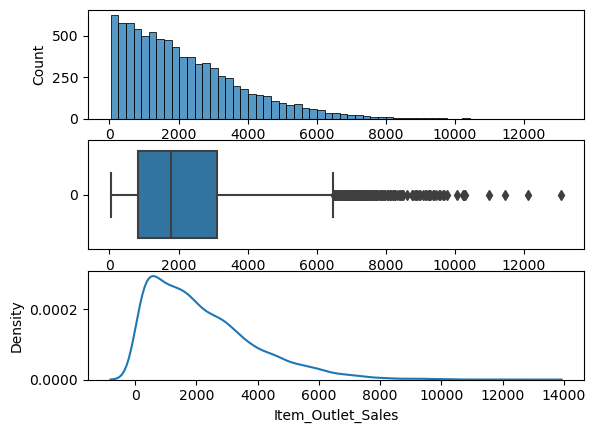

In [411]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,ax=ax[1],orient='h')
sns.kdeplot(y,ax=ax[2])
plt.show()


In [412]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [413]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,outlet_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,itemcode_DR,itemcode_FD,itemcode_NC
0,-0.824939,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.623224,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.111729,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.513233,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.912325,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [414]:
# Machine Learning - Training the machines on historical data and build
# predictive models and use those models for predictive purposes.
# Supervised Learning - Complete understaning data interms of variables
# and also know which models or algorithms to be implemented.
# Unsupervised Learning - No understanding of data as data might not be
# proper structure or hardware failure during collection process lead
# to discrepancies and lack of understanding of data.
# Supervised Learning -
# Regression Models - Dependent Variable(y) is numeric continuous, closer
# to normal distribution with minimum outliers and no missing values.
# Classification Models - Dependent Variable(y) is Non Numeric and either
# Binary(yes/no) or multinomial (more than 2 levels/classes).
# Regression Models - primary model is Multiple Linear Regression(MLR)
# Multiple Linear Regression explains the linear relationship between a
# dependent variable(y) that is numerical continuos, closer to normal
# distribution and multiple Independent Variables(X's).
# Multiple Linear Regression is an equation that is used for prediction
# purposes.
# y = B0+B1X1+B2X2+B3X3+B4X4+............+BnXn + Et
# y is dependent variable which must be numerical continuos closer to
# normal distribution with minimal outliers and no missing values.
# B0 - intercept or constant - point at which straight line touches y-axis
# B1,B2,B3,B4,...Bn - Coefficients
# X1, X2, X3, X4,..Xn - Independent Variables
# Et - Error term or Residual=ActualValue-PredictedValue
# Algorithm uses matrix formulation to solve for the Intercept+Corfficients
# [Bo,B1,B2,B3,...Bn] = (XT*X)^-1*XT*y
# XT= Transpose of X
# (XT*X)^-1 = Inverse of Matrix
# y = dependent Variable
# X = Independent Variable Matrix
# Assumptions of Multiple Linear Regression
# Pre Model Assumptions
# y must be numerical continuos, closer to normal distribution with
# minimum outliers and no missing values.
# X can be both numerical and non numerical


# There must be a logical linear relationship between dependent variable
# and Independent variables.
# No Multicollinearity - Multicollinearity means very strong correlation
# (>0.95) among variables. If multicollinearity is found do not include
# both variables, choose one among them. Correlation Analysis.
# Exogenity - Dependent Variable is dependent on Independent variables
# but not vice-versa. y is dependent on X's but X's do not depend on y.
# Sample Size required is minimum 20 observations per variable.
# Post Model Assumptions based on residuals
# Residuals must be homoscedastic in nature. Homoscedasticity of residuals
# is residuals must be in a narrow range left to right diagonal Upwards.
# Residuals must be normally distributed and to find this we use
# Q-Q plot. If residuals are all on straight line or closer to straight
# line
# Statistical Interpretation of Multiple Linear Regression Output
# 1) Adjusted R Square must be in range of 0.60 - 0.95. Adjusted R Square
# explains the amount of variance occuring in the dependent variable
# casused by the model or independent variables.
# Adjusted R Square is sensitive to Independent Variable significance.
# It reduces if independent variable is insignificant and increases only
# if independent variable is significant.
# 2) Model p-value(just below adj R Square) or Significanc F (MS Excel)
# must be less than 0.05.
# Null - Coefficients are Equal to Zero
# Alt - Coefficients are Not Equal to Zero.
# 3) Independent variables p-value must be less than 0.05
# Null - Independent Variable is Insignificant
# Alt - Independent Variable is Significant
# Python Interpretation (Machine Learning based interpretation)
# R Square betweeen 0.60 - 0.95
# Intercept + Coefficients
# Diagnostics for all Regression Models
# Root Mean Square Error (RMSE) - No Fixed Range and it is a comparitive
# metric and model that has the least RMSE is best fit Model.
# RMSE = SQRT(MEAN(RESIDUAL^2)) # Residual=ActualValue-PredictedValue

In [415]:
from sklearn.linear_model import LinearRegression

In [416]:
reg=LinearRegression()

In [417]:
regmodel=reg.fit(X,y)

In [418]:
regmodel.score(X,y)  # less then 0.60-model is underfitting

0.5637165775578303

In [419]:
regmodel2=reg.fit(X,np.log(y))  #lograthemic transformation of y

In [420]:
regmodel2.score(X,np.log(y))  #not underfitting

0.7213095357155783

In [421]:
regmodel2_predict=np.exp(regmodel2.predict(X))

In [422]:
regmodel_predict=regmodel.predict(X)

In [423]:
regmodel2_resid=y-regmodel2_predict

In [424]:
regmodel_resid=y-regmodel_predict

In [425]:
np.sqrt(np.mean(regmodel2_resid**2))  #RMSE with log transform

1140.6706035768889

In [426]:
np.sqrt(np.mean(regmodel_resid**2)) #RMSE without log transform

2763.3208196202054

In [427]:
#prediction on test data which didnt have dependent variable
reg_test_predict=regmodel2.predict(bigmarttest_df) 

In [428]:
reg_test_predict=np.exp(reg_test_predict)

In [429]:
reg_test_predict

array([1441.49709238, 1134.76366947,  586.41248279, ..., 1458.48900396,
       3655.91456001, 1091.29155597])

In [430]:
pd.DataFrame(reg_test_predict).to_csv("reg.csv")

In [431]:
from sklearn.tree import DecisionTreeRegressor

In [432]:
tree=DecisionTreeRegressor(max_depth=8) #dont go max depth above 12 and below 6

In [433]:
treemodel=tree.fit(X,np.log(y))

In [434]:
treemodel.score(X,np.log(y))  #Adjusted R square.Its overfitting

0.767890355332978

In [435]:
from sklearn.model_selection import cross_val_score

In [436]:
cross_val_score(tree,X,np.log(y))

array([0.69626802, 0.68370619, 0.68641615, 0.68946904, 0.72781402])

In [437]:
tree_test_pred=treemodel.predict(bigmarttest_df)

In [438]:
tree_test_pred=np.exp(tree_test_pred)

In [439]:
pd.DataFrame(tree_test_pred).to_csv("tree.csv")

In [440]:
#Randomforest

In [441]:
from sklearn.ensemble import RandomForestRegressor

In [442]:
rf=RandomForestRegressor(n_estimators=1000,max_depth=8)

In [443]:
rfmodel=rf.fit(X,np.log(y))

In [444]:
rfmodel.score(X,np.log(y))

0.7793399654282755

In [457]:
cross_val_score(rf,X,np.log(y))

array([0.72747117, 0.72114736, 0.72507948, 0.72189029, 0.75335233])

In [446]:
rf_predict=rfmodel.predict(X)

In [447]:
rf_resid=y-rf_predict

In [448]:
np.sqrt(np.mean(rf_resid**2))

2763.311420210166

In [449]:
rf_test_predict=rfmodel.predict(bigmarttest_df)

In [450]:
rf_test_predict=np.exp(rf_test_predict)

In [451]:
pd.DataFrame(rf_test_predict).to_csv("bigmart_rf.csv")

In [452]:
from sklearn.ensemble import GradientBoostingRegressor

In [453]:
gbm=GradientBoostingRegressor(n_estimators=1000)

In [454]:
gbmmodel=gbm.fit(X,np.log(y))

In [456]:
gbmmodel.score(X,np.log(y))

0.8282633267972873

In [458]:
cross_val_score(gbm,X,np.log(y))

array([0.70846099, 0.70532187, 0.70170808, 0.69234714, 0.73731297])

In [459]:
gbm_predict=gbmmodel.predict(X)

In [460]:
gbm_resid=y-gbm_predict

In [461]:
np.sqrt(np.mean(gbm_resid**2))

2763.288678742106

In [464]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [465]:
#GRIDSEARCH is a Hyperparameter model/technique to increase the performance of the model without taking much imputation time
# This search selects the best combinations by considering all the combinations in the dataset
#Hyperparameters are parameters which can be decided by the model builder to increasethe perforamnce like n_estimators,max_depth

In [466]:
knn=KNeighborsRegressor()

In [467]:
k_range=list(range(1,25))

In [468]:
param_grid=dict(n_neighbors=k_range)

In [469]:
grid=GridSearchCV(knn,param_grid,cv=3)

In [470]:
gridsearch=grid.fit(X,np.log(y))

In [471]:
gridsearch.best_params_

{'n_neighbors': 22}

In [472]:
gridsearch.best_score_

0.6935837055596069

In [475]:
from sklearn.svm import SVR

In [476]:
svm=SVR()

In [477]:
svmodel=svm.fit(X,np.log(y))

In [479]:
svmodel.score(X,np.log(y))

0.762471247261068

In [ ]:
#Among all the models GBM is the best fit model
#fit the test model and predict with GBM

In [480]:
gbm_test_predict=gbmmodel.predict(bigmarttest_df)

In [481]:
gbm_test_predict=np.exp(gbm_test_predict)

In [482]:
pd.DataFrame(gbm_test_predict).to_csv("bigmart_gbm.csv")

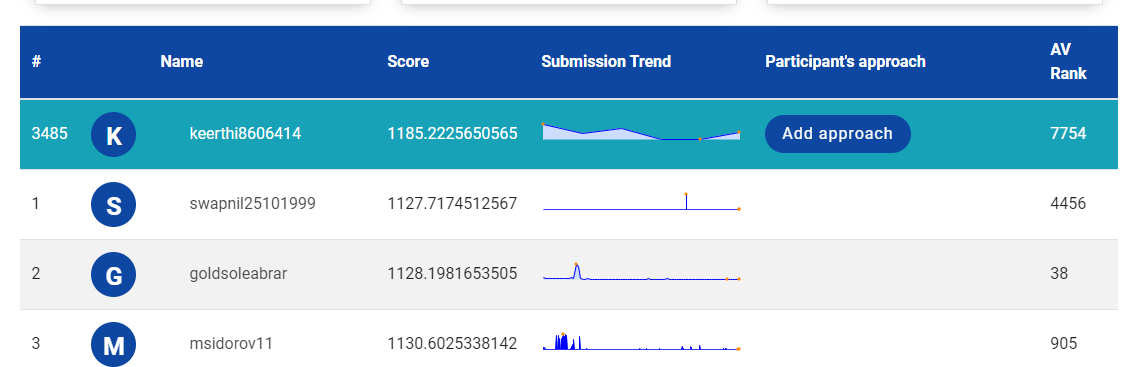